In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
master_df = pd.read_parquet(Path("data") / "train.parquet")

In [3]:
import ydata_profiling

master_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Verify the length of the time series is the same for each of 56 unique modalities of counter_name

- Starting: 09-01-2020 at 1h to 2021-09-09 at 23h

- A counter has been installed during the time of the study ? Which one ?



In [4]:
# Count the number of unique dates for each counter_id and get the min and max date
date_info = master_df.groupby('counter_id').agg(
    num_dates=('date', 'nunique'),
    min_date=('date', 'min'),
    max_date=('date', 'max'),
    installation_date=('counter_installation_date', 'first')
).reset_index()

# Order the results based on the count
date_info_sorted = date_info.sort_values(by='num_dates', ascending=True)

date_info_sorted

,counter_id,num_dates,min_date,max_date,installation_date
55,300014702-353245972,6577,2020-12-09 23:00:00,2021-09-09 23:00:00,2020-11-29
54,300014702-353245971,6577,2020-12-09 23:00:00,2021-09-09 23:00:00,2020-11-29
6,100042374-109042374,8519,2020-09-01 01:00:00,2021-09-09 23:00:00,2017-12-15
7,100042374-110042374,8519,2020-09-01 01:00:00,2021-09-09 23:00:00,2017-12-15
20,100049407-353255860,8968,2020-09-01 01:00:00,2021-09-09 23:00:00,2018-12-07
19,100049407-353255859,8968,2020-09-01 01:00:00,2021-09-09 23:00:00,2018-12-07
47,100057380-104057380,8973,2020-09-01 01:00:00,2021-09-09 23:00:00,2020-02-11
32,100056330-103056330,8974,2020-09-01 01:00:00,2021-09-09 23:00:00,2019-11-14
33,100056330-104056330,8974,2020-09-01 01:00:00,2021-09-09 23:00:00,2019-11-14
34,100056331-103056331,8974,2020-09-01 01:00:00,2021-09-09 23:00:00,2019-11-05


Remark that: 

- 100042374-109042374 / 100042374-110042374 / 100049407-353255860 / 100049407-353255859 / 100057380-104057380 

Have missing values in the time series // Makes it difficult to compute lag features unless some values are manually inputed


In [5]:
master_df.isnull().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64

### Encode the dates (For viz purposes, keep the date column for now)

In [6]:
# Import the holidays package that contains the data for FR
import holidays 
from lockdowndates.core import LockdownDates

def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year.astype('category')
    X.loc[:, "date_ws"] = X["date"].dt.date.astype('datetime64[ns]') # To be used for merging
    X.loc[:, "month"] = X["date"].dt.month.astype('category')
    X.loc[:, "day"] = X["date"].dt.day.astype('category')
    X.loc[:, "weekday"] = X["date"].dt.weekday.astype('category')
    X.loc[:, "hour"] = X["date"].dt.hour.astype('category')
    X.loc[:, "week_of_year"] = X["date"].dt.isocalendar().week.astype('category')
    X.loc[:, "season"] = X["week_of_year"].apply(lambda w: (w // 13) % 4 + 1).astype('category')

    # Add the column corresponding to holidays
    fr_holidays = holidays.FR(years=X["year"].unique().tolist())
    X.loc[: ,'holidays'] = X['date'].apply(lambda x: x in fr_holidays or x.weekday() >= 5).astype(int)

    # Add covid restrictions
    ld = LockdownDates("France", "2020-09-01", "2022-01-01", ("stay_at_home", "masks"))
    lockdown_dates = ld.dates()
    X = X.reset_index().merge(lockdown_dates['france_stay_at_home'], how='left', left_on='date_ws', right_index=True).set_index('index')

    return X

In [7]:
master_df_dates = _encode_dates(master_df)
#master_df_dates = _get_holidays(master_df_dates)

master_df_dates

Fetching lockdown dates...
Fetched lockdown dates for: France


,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,year,date_ws,month,day,weekday,hour,week_of_year,season,holidays,france_stay_at_home
index,,,,,,,,,,,,,,,,,,,,,
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,2020-09-01,9,1,1,2,36,3,0,0.0
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,2020-09-01,9,1,1,3,36,3,0,0.0
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,2020-09-01,9,1,1,4,36,3,0,0.0
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,2020-09-01,9,1,1,15,36,3,0,0.0
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,2020-09-01,9,1,1,18,36,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,2021-09-09,9,9,3,6,36,3,0,0.0
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,2021-09-09,9,9,3,10,36,3,0,0.0
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,2021-09-09,9,9,3,15,36,3,0,0.0


In [8]:
master_df_dates['holidays'].value_counts()

holidays
0    346689
1    150138
Name: count, dtype: int64

In [9]:
master_df_dates['season'].value_counts()

season
1    130930
3    125322
2    122164
4    118411
Name: count, dtype: int64

### Vizs

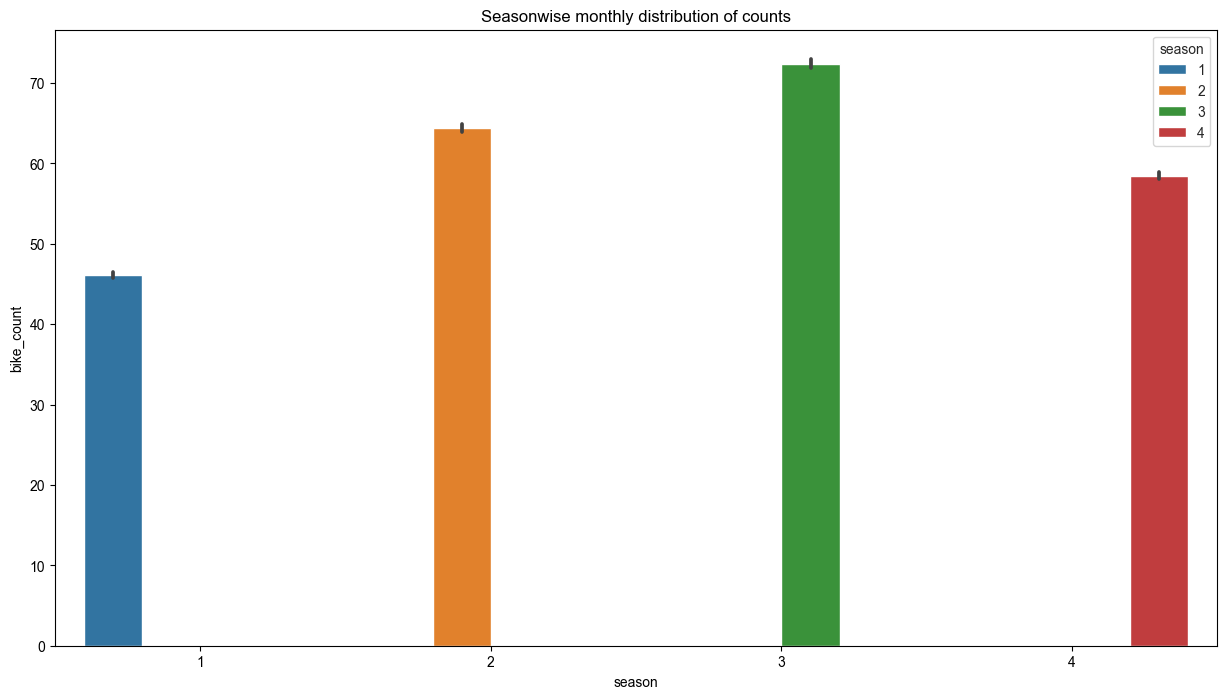

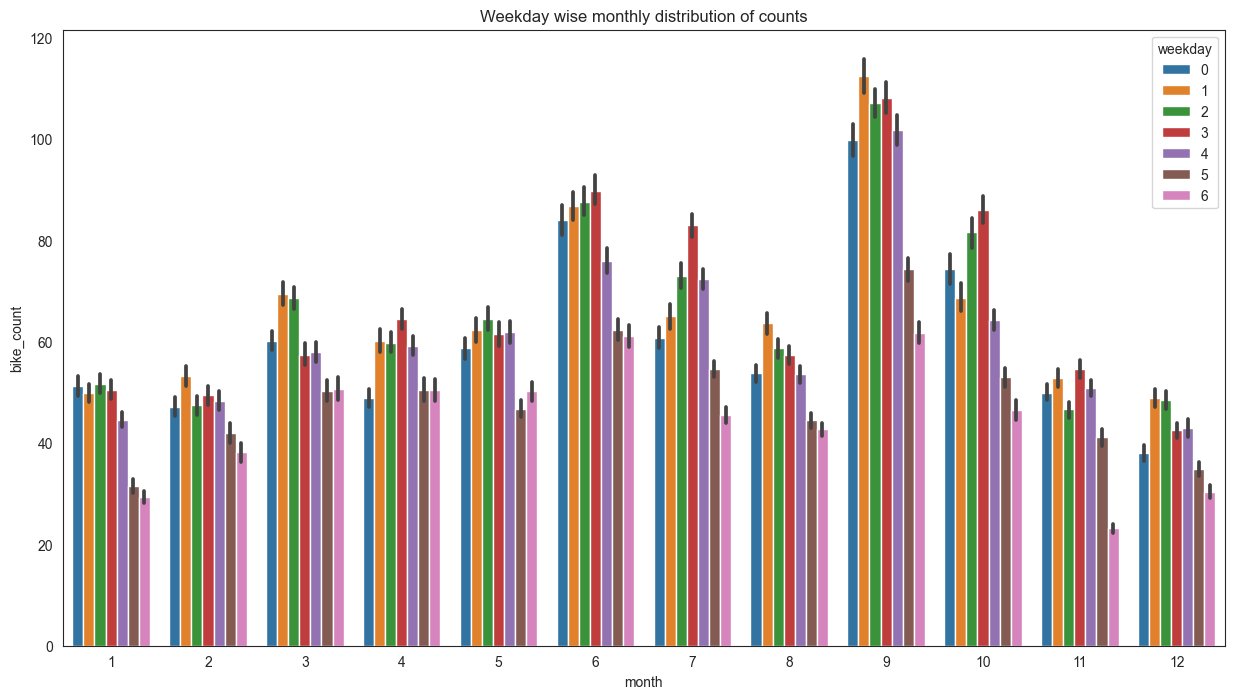

In [10]:
import seaborn as sns
%matplotlib inline

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='season',y='bike_count',data=master_df_dates[['month','bike_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='bike_count',data=master_df_dates[['month','bike_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

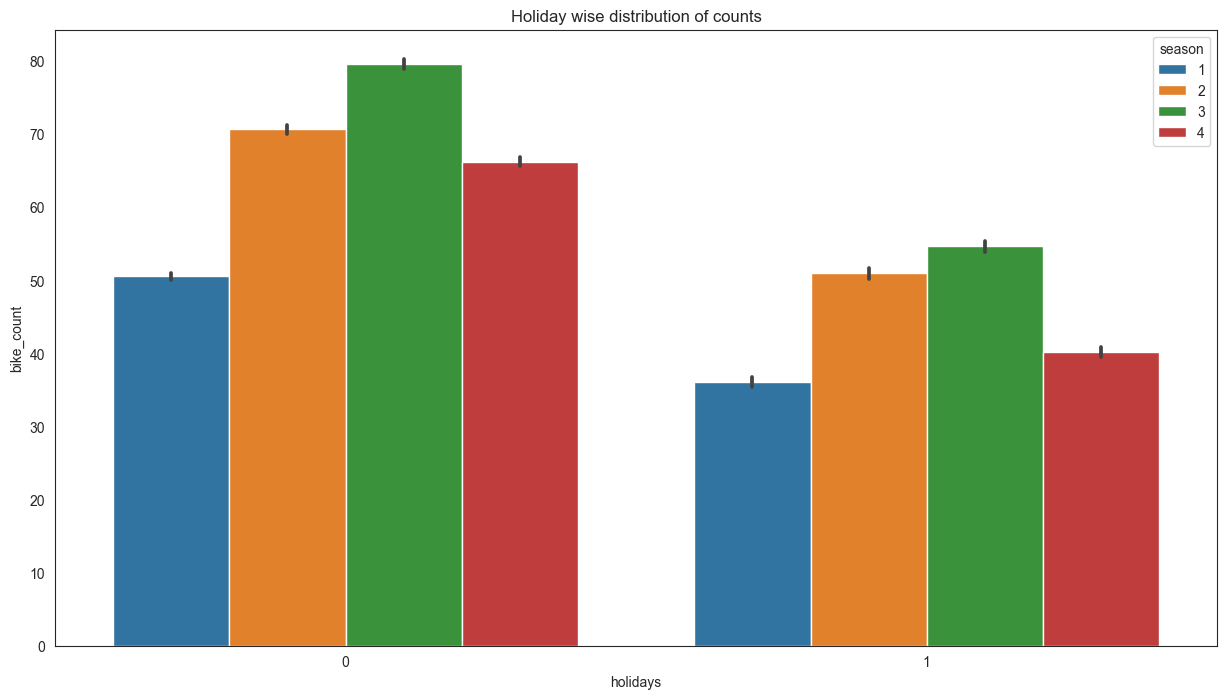

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=master_df_dates,x='holidays',y='bike_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

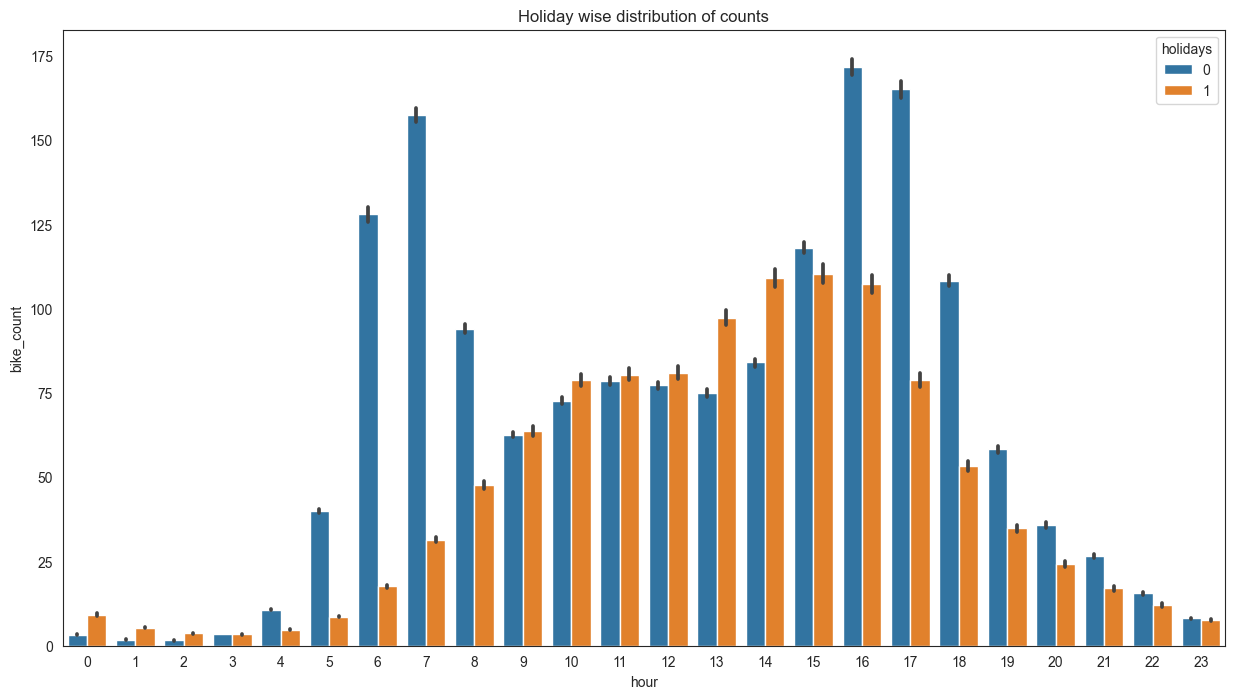

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=master_df_dates,x='hour',y='bike_count',hue='holidays')
ax.set_title('Holiday wise distribution of counts')
plt.show()

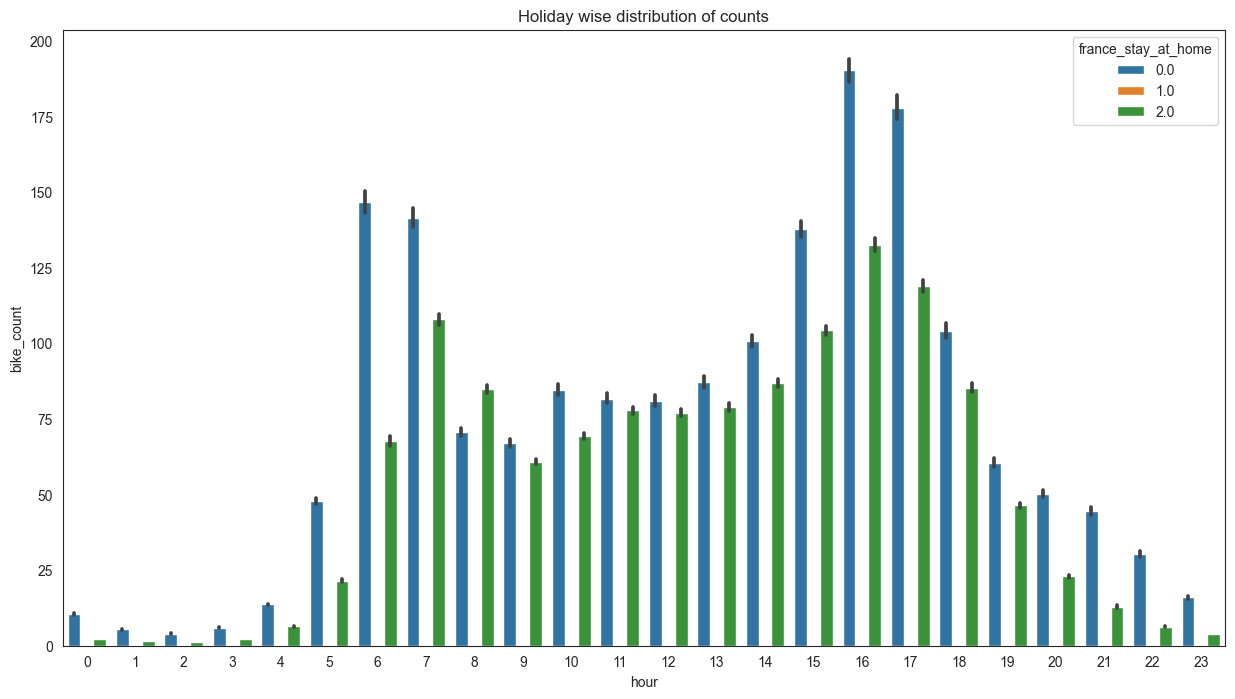

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=master_df_dates,x='hour',y='bike_count',hue='france_stay_at_home')
ax.set_title('Holiday wise distribution of counts')
plt.show()

Add the information about the other transports: 

In [14]:
column_names = ['longitude', 'latitude', 'station_name']  # Replace with your actual column names
idf_stations = pd.read_csv(Path("data") / "Stations_IDF.csv", delimiter=';', header=None, names=column_names)

In [15]:
import haversine as hs

def _closest_transport(X): 
    X = X.copy()
    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame(columns=['counter_id', 'closest_metro_distance'])

    # Iterate over unique counter_ids in X
    for counter_id in X['counter_id'].unique():
        coordinates_counter = (X.loc[X['counter_id'] == counter_id, 'latitude'].values[0],
                               X.loc[X['counter_id'] == counter_id, 'longitude'].values[0])

        # Calculate distances to all metro stations
        distances = []
        for _, station_row in idf_stations.iterrows():
            coordinates_station = (station_row['latitude'], station_row['longitude'])
            distance = hs.haversine(coordinates_counter, coordinates_station)
            distances.append(distance)

        # Get the k closest distances
        closest_distance = sorted(distances)[0]

        # Append to the result DataFrame
        result_df = pd.concat([result_df, pd.DataFrame({'counter_id': [counter_id], 'closest_metro_distance': [closest_distance]})])
    
    result_df = result_df.set_index('counter_id')
    X = X.reset_index().merge(result_df['closest_metro_distance'], how='left', left_on='counter_id', right_index=True).set_index('index')
        
    return X

In [ ]:
def CountStationsWithinRadius(X, idf_stations, radius=0.5): 
    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame(columns=['counter_id', 'num_stations_within_radius'])

    # Iterate over unique counter_ids in X
    for counter_id in X['counter_id'].unique():
        coordinates_counter = (X.loc[X['counter_id'] == counter_id, 'latitude'].values[0],
                               X.loc[X['counter_id'] == counter_id, 'longitude'].values[0])

        # Count stations within the given radius
        num_stations_within_radius = 0
        for _, station_row in idf_stations.iterrows():
            coordinates_station = (station_row['latitude'], station_row['longitude'])
            distance = hs.haversine(coordinates_counter, coordinates_station)

            if distance <= radius:
                num_stations_within_radius += 1

        # Append to the result DataFrame
        result_df = pd.concat([result_df, pd.DataFrame({'counter_id': [counter_id], 'num_stations_within_radius': [num_stations_within_radius]})])

    return result_df

In [16]:
# Test and keep 

transport_df = _closest_transport(master_df_dates)

transport_df

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,date_ws,month,day,weekday,hour,week_of_year,season,holidays,france_stay_at_home,closest_metro_distance
index,,,,,,,,,,,,,,,,,,,,,
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020-09-01,9,1,1,2,36,3,0,0.0,0.193348
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020-09-01,9,1,1,3,36,3,0,0.0,0.193348
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020-09-01,9,1,1,4,36,3,0,0.0,0.193348
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020-09-01,9,1,1,15,36,3,0,0.0,0.193348
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020-09-01,9,1,1,18,36,3,0,0.0,0.193348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021-09-09,9,9,3,6,36,3,0,0.0,0.038665
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021-09-09,9,9,3,10,36,3,0,0.0,0.038665
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021-09-09,9,9,3,15,36,3,0,0.0,0.038665


In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = .groupby(["weekday", "hour"])["count"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)